# Simple Linear Regression

## Import modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load datasets

In [ ]:
# Load dataset file
data = pd.read_csv('kc_house_data.csv', usecols=['price', 'sqft_living'])
data

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


(17290, 1)
(17290, 1)


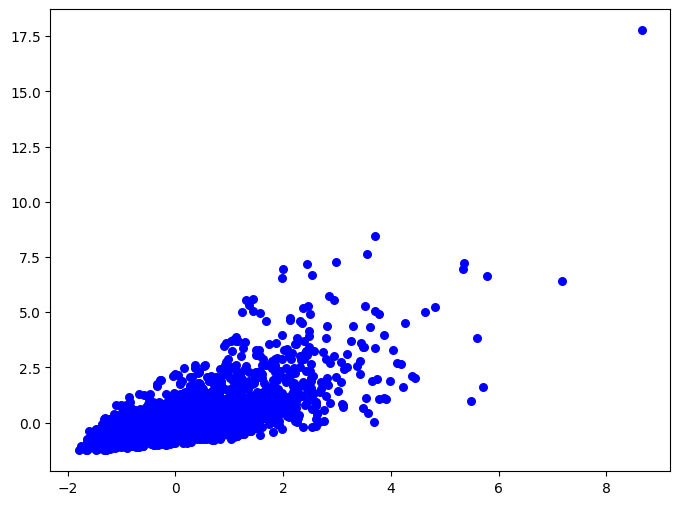

In [ ]:
# Numpy 배열로 전환
data_np = np.array(data)

x = data_np[:, 1]          # sqft_living
y = data_np[:, 0]          # price

# Dataset 정규화
x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

x = (x-x_mean)/x_std
y = (y-y_mean)/y_std

# 2차원 행렬 변환
x = np.expand_dims(x, 1)
y = np.expand_dims(y, 1)

# Train dataset / Test dataset 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

print(x_train.shape)
print(y_train.shape)

# 시각화
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='b', marker='o', s=30)
plt.show()

## Least Square Method

- a 행렬과 똑같은 크기의 1로 채워진 행렬 생성:
  ```python
  arr = np.ones_like(a)
  ```
- 행렬 가로 쌓기:
  ```ptrhon
  arr = np.hstack([a, b])
  ```
- 행렬 곱:
  ```python
  arr = np.dot(a, b)
  ```
- 전치 행렬:
  ```python
  arr = a.T
  ```
- 역 행렬:
  ```python
  arr = np.linalg.inv(a)
  ```


- Goal:
$$\theta = (X^T \cdot X)^{-1} \cdot (X^T \cdot Y)$$


In [85]:
def LSM(x, y):
  # 행렬 X에 bias 열 추가
  bias = np.ones_like(x)
  X = np.hstack([x, bias])
  # x = np.array([[-3], [-1], [1], [3]])
  # y = np.array([[-1], [-1], [3], [3]])

  # X transepose 생성
  XT = X.T

  # X^T * X 생성
  XTX = np.dot(XT, X)

  # (X^T * X)^-1 생성
  XTX_inverse = np.linalg.inv(XTX)

  # X^T * Y 생성
  XTY = np.dot(XT, y)

  # theta 계산
  theta = np.dot(XTX_inverse, XTY)

  return theta[0], theta[1]

In [86]:
w, b = LSM(x_train, y_train)
print(w, b)

[[0.8]
 [1. ]]


## Prediction

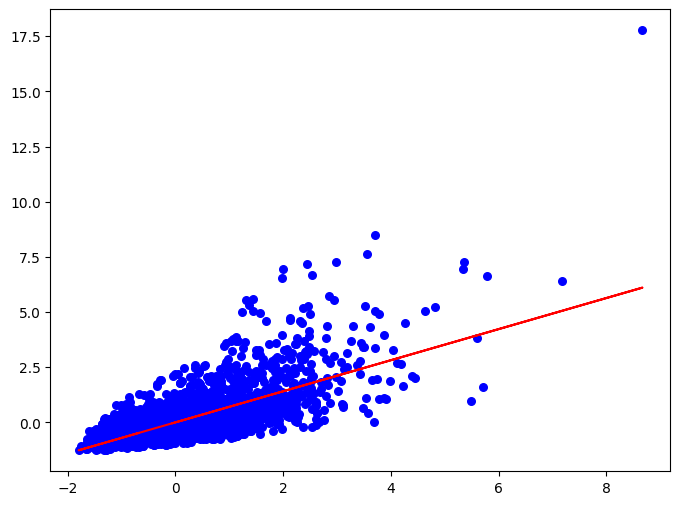

In [71]:
# Test dataset을 이용한 예측
y_ = []
for i in x_test:
  y_.append(i*w + b)

# 시각화
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='b', marker='o', s=30)
plt.plot(x_test, y_, color='r')
plt.show()

## Gradient Decent Method

- a 행렬과 똑같은 크기의 1로 채워진 행렬 생성:
  ```python
  arr = np.ones_like(a)
  ```
- 행렬 가로 쌓기:
  ```ptrhon
  arr = np.hstack([a, b])
  ```
- 행렬 곱:
  ```python
  arr = np.dot(a, b)
  ```
- 행렬 내 요소 합:
  ```python
  s = np.sum(a)
  ```

In [ ]:
def GDM(x, y):
  # 하이퍼 파라미터 설정
  learning_rate = 0.1
  n_iters = 100

  # w, b 초기값 설정
  w = 0
  b = 0

  # 행렬 X에 bias 열 추가
  bias = np.ones_like(x)
  X = np.hstack([x, bias])

  for i in range(n_iters):
    # [[w],
    #  [b]] 행렬 생성

    theta = np.array([w, b])
    theta = theta.reshape(2, 1)

    # y_hat 계산
    y_hat = np.dot(X, theta)

    # dw, db 계산
    dw = 2/x.shape[0] * sum((y - y_hat) * -x)
    db = 2/x.shape[0] * sum((y - y_hat) * -1)

    # w, b 업데이트
    w = w - learning_rate * dw
    b = b - learning_rate * db

    print("w ", w, "\b", b)

  return w, b

In [ ]:
w, b = GDM(x_train, y_train)
print(w, b)

[0.70406843] [0.00267388]


## Prediction

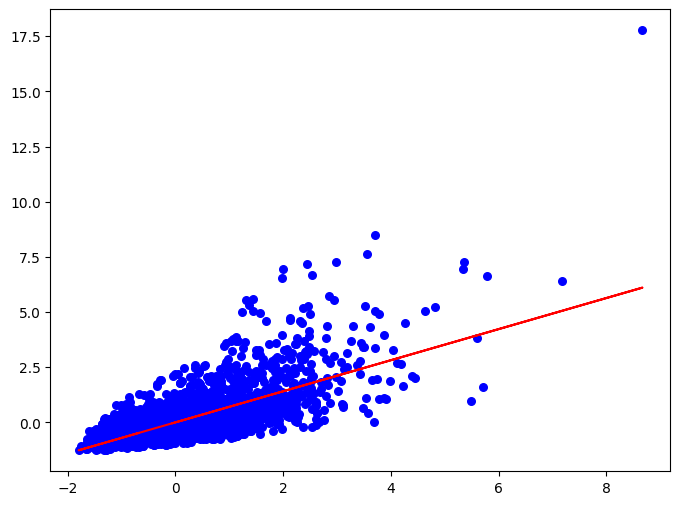

In [ ]:
# Test dataset을 이용한 예측
y_ = []
for i in x_test:
  y_.append(i*w + b)

# 시각화
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='b', marker='o', s=30)
plt.plot(x_test, y_, color='r')
plt.show()